In [1]:
from BMX_Classes import *
import pandas as pd
import numpy as np

working_directory=u"/home/tyndall/20200309_Yale_BMX_Data/"
drone_directory=u'/hirax/rf_data/bnl_202003/drone_data/drone_20200312/'

## Pull list of BMX data files:
fileslist=np.sort(glob.glob('*.data'))
idstringlist=np.sort(list(set([fn.split('_yale_')[0] for i,fn in enumerate(fileslist)])))
os.chdir(working_directory)
    
print('')
## Pull list of processed drone csv files:
os.chdir(drone_directory)
drone_list=np.sort(glob.glob('*processed.csv'))

os.chdir(working_directory)

In [2]:
#CATALOG OF ALL DRONE FLIGHTS AND CORRESPONDING BMX FILES
file_organizer

{'Monday': [['FLY304', '200309_1825'],
  ['FLY305', '200309_1917'],
  ['FLY306', '200309_1943'],
  ['FLY310', '200309_2109']],
 'Tuesday': [['FLY311', '200310_1427'],
  ['FLY313', '200310_1526'],
  ['FLY316', '200310_1918'],
  ['FLY317', '200310_1952']],
 'Wednesday': [['FLY322', '200311_1431'],
  ['FLY324', '200311_1524'],
  ['FLY326', '200311_1604'],
  ['FLY331', '200311_1841'],
  ['FLY338', '200311_2025']],
 'Thursday': [['FLY340', '200312_1434'],
  ['FLY341', nan],
  ['FLY342', '200312_1702'],
  ['FLY343', '200312_1732'],
  ['FLY344', '200312_1813'],
  ['FLY347', '200312_1944'],
  ['FLY349', '200312_2011'],
  ['FLY351', '200312_2047'],
  ['FLY352', '200312_2118'],
  ['FLY353', '200312_2152']]}

In [3]:
#Class for dealing with 1 flight at a time
fly344 = Do_Everything_For_Data(drone_directory, file_organizer['Thursday'][4][0], working_directory, file_organizer['Thursday'][4][1])
fly347 = Do_Everything_For_Data(drone_directory, file_organizer['Thursday'][5][0], working_directory, file_organizer['Thursday'][5][1])



DRONE CLASS initialized -- Loading Drone RTK Data from FLY344:
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
BMX_Data CLASS initialized -- Loading Telescope Data from 200312_1813:
  Constructing time array from header mjd:
  Constructing raw autocorrelation data array (dims=[2,4,freq,time]):
DRONE CLASS initialized -- Loading Drone RTK Data from FLY347:
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
BMX_Data CLASS initialized -- Loading Telescope Data from 200312_1944:
  Constructing time array from header mjd:
  Constructing raw autocorrelation data array (dims=[2,4,freq,time]):


In [4]:
#Class for dealing with two flights
#note: still need to add in mechanism for substracting out backgrounds

fly344_347 = concat_files_Do_Everything_For_Data('/hirax/rf_data/bnl_202003/drone_data/drone_20200312/', file_organizer['Thursday'][4][0], \
                                                 file_organizer['Thursday'][5][0], working_directory, file_organizer['Thursday'][4][1], file_organizer['Thursday'][5][1])


DRONE CLASS initialized -- Loading Drone RTK Data from FLY344:
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
BMX_Data CLASS initialized -- Loading Telescope Data from 200312_1813:
  Constructing time array from header mjd:
  Constructing raw autocorrelation data array (dims=[2,4,freq,time]):
BMX_Data CLASS initialized -- Loading Telescope Data from 200312_1944:
  Constructing time array from header mjd:
  Constructing raw autocorrelation data array (dims=[2,4,freq,time]):


Most functions here take arguments (dish_index, frequency_index)

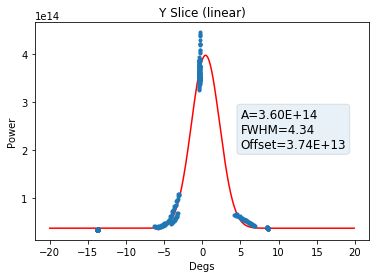

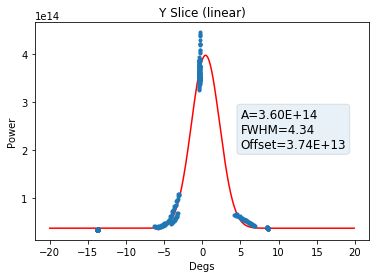

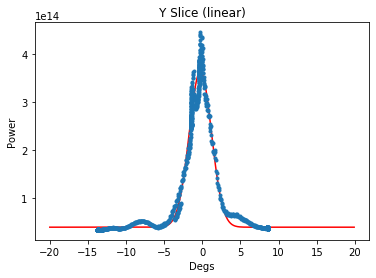

In [5]:
#Plot slices in X,Y in both linear and dB. Can choose bounds for collecting cut data in between
#(Default for cutting data is +-0.5 degrees about the beam center, determined from fits)
#Can also choose whether you want fit parameters displayed

fly344.plot_y_lin(0,101)
plt.show()

#Above is equivalent to:

fly344.plot_y_lin(0,101, lb = -0.5, ub = 0.5, params=True)
plt.show()

#for this flight, we flew more than half a degree off center,
#so adjust parameters slightly to capture full pass

fly344.plot_y_lin(0,101, lb = 0, ub = 1, params=False)
plt.show()

/home/erk26/BMX_for_github/BMX_Classes_V2.py:319: RuntimeWarning: invalid value encountered in log10
  mag_=10*np.log10(np.array(mags))


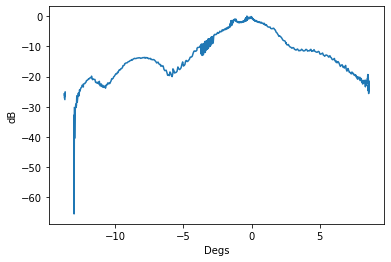

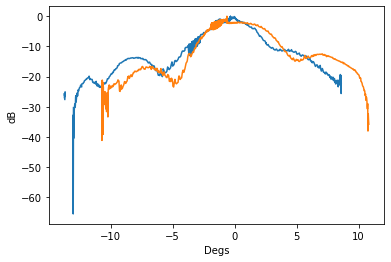

In [6]:
#Plot Cuts in dB
fly344.plot_y_db(0,101,0,1)
plt.show()
#You can flip profile to compare to opposite dish
#This is clearer with higher power flights
fly344.plot_y_db(0,101,0,1)
fly344.plot_y_db(2,101,0,1, flipped = True)

plt.show()


In [7]:
#other things we can do: print parameters, or get them and covariance matrix as arrays
fly344.print2Dparams(0,100)
fly344params = fly344.get2Dparams(0,100)

print(' ')
print('Fit Parameters = ',fly344params[0])

amplitude = 3.47E+14
xo = 2.24E-02
yo = 3.31E-02
fwhm_x = 4.58E+00
fwhm_y = 3.90E+00
theta = -2.05E-04
offset = 3.49E+13
 
Fit Parameters =  [ 3.47423200e+14  2.23599096e-02  3.30830624e-02  1.94666420e+00
  1.65402044e+00 -2.05096068e-04  3.48522684e+13]


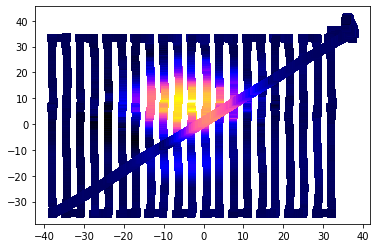

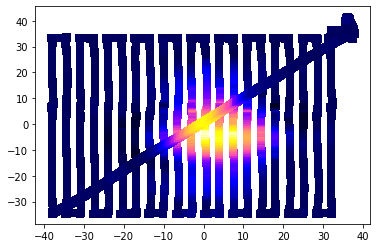

In [8]:
#generate scatter plots for different dishes
fly344.plotscatter(0,50)
plt.show()
fly344.plotscatter(1,50)


In [9]:
#For When you want to manipulate data yourself, it is stored in a dict
fly344.fulldict.keys()

dict_keys(['FLY', 'BMXdir', 'autos', 'drone_time', 'tel_time', 'x', 'y', 'z', 'thetaX', 'thetaY', 'thetaX_beam', 'thetaY_beam', 'r', 'yaw', 'phi'])

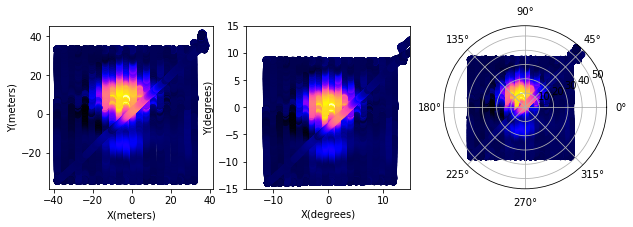

In [10]:
#You can also access all data from the dictionary, here are three example scatter plots for dish 0

fig = plt.figure(figsize = (10,3))
ax = fig.add_subplot(1,3,1)
ax.scatter(fly344.fulldict['x'], fly344.fulldict['y'], c = (fly344.fulldict['autos'][0,:,50]), cmap = 'gnuplot2', norm = LogNorm())
ax.set_xlabel('X(meters)')
ax.set_ylabel('Y(meters)')

ax = fig.add_subplot(1,3,2)
ax.scatter(np.degrees(fly344.fulldict['thetaX_beam'][0]), np.degrees(fly344.fulldict['thetaY_beam'][0]), c = (fly344.fulldict['autos'][0,:,50]), cmap = 'gnuplot2', norm = LogNorm())
ax.set_xlabel('X(degrees)')
ax.set_ylabel('Y(degrees)')
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)

ax = fig.add_subplot(1,3,3, projection = 'polar')
ax.scatter(fly344.fulldict['phi'], fly344.fulldict['r'], c = (fly344.fulldict['autos'][0,:,50]), cmap = 'gnuplot2', norm = LogNorm())

Text(0.5, 0, 'Freq Index')

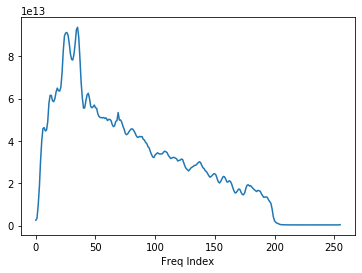

In [11]:
#To plot a spectrum for dish 0 at time sample 100:
plt.plot(fly344.fulldict['autos'][0,100,:])
plt.xlabel('Freq Index')

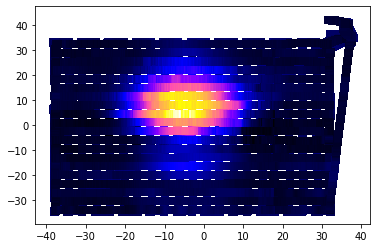

In [12]:
#overplotting on top of eachother
fly344.plotscatter(0,50)
fly347.plotscatter(0,50)


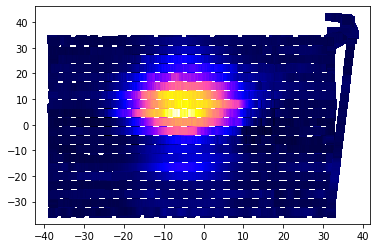

In [13]:
#ALso can repeat all of this with combined files
fly344_347.plotscatter(0,50)



In [14]:
#Now will deal with Wedndays data with dual pol flights

#Here is an example of reading in all Wed Data at once into a dictionary

WedFlightsDict = {}
for i in range(len(file_organizer['Wednesday'])):
    print(file_organizer['Wednesday'][i][0])
    WedFlightsDict[i] = Do_Everything_For_Data_dual('/hirax/rf_data/bnl_202003/drone_data/drone_20200311/', file_organizer['Wednesday'][i][0],\
                            working_directory, file_organizer['Wednesday'][i][1])

FLY322
DRONE CLASS initialized -- Loading Drone RTK Data from FLY322:
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
BMX_Data CLASS initialized -- Loading Telescope Data from 200311_1431:
  Constructing time array from header mjd:
  Constructing raw autocorrelation data array (dims=[2,4,freq,time]):
FLY324
DRONE CLASS initialized -- Loading Drone RTK Data from FLY324:
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
BMX_Data CLASS initialized -- Loading Telescope Data from 200311_1524:
  Constructing time array from header mjd:
  Constructing raw autocorrelation data array (dims=[2,4,freq,time]):
FLY326
DRONE CLASS initialized -- Loading Drone RTK Data from FLY326:
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
BMX_Data CLASS initialized -- Loading Telescope Data from 200311_1604:
  Constructing time array from header mjd:
  Constructing raw autocorrelation data arra

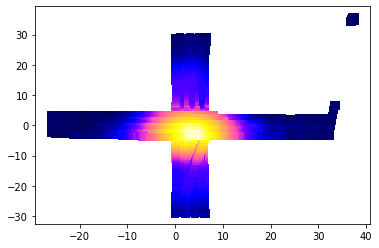

In [15]:
#Plot pol 0 dish 1 from first flight
WedFlightsDict[0].plotscatter(0,1,100)


Text(0.5, 1.0, 'Polarization 1')

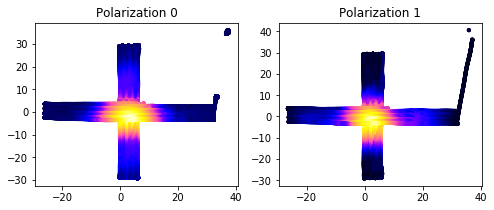

In [17]:
#Plot Two Pols Dish 1 for first flight
fig = plt.figure(figsize = (8,3))
ax = fig.add_subplot(1,2,1) 
ax.scatter(WedFlightsDict[0].pol0['x'], WedFlightsDict[0].pol0['y'], c = (WedFlightsDict[0].pol0['autos'][1][:,100]), cmap = 'gnuplot2', norm = LogNorm(), marker = '.')
ax.set_title('Polarization 0')

ax = fig.add_subplot(1,2,2) 
ax.scatter(WedFlightsDict[0].pol1['x'], WedFlightsDict[0].pol1['y'], c = (WedFlightsDict[0].pol1['autos'][1][:,100]), cmap = 'gnuplot2', norm = LogNorm(), marker = '.')
ax.set_title('Polarization 1')
